# Tugas 2 (Kelompok 4)
### Nama:
- Andika Rahman Teja (5025221022)
- Surya Fadli Alamsyah (5025221059)
- Mohammad Idris Arif Budiman (5025221114)

In [49]:
# !pip install sympy
# !pip install imageio

# Cukup dijalankan sekali saja

  Obtaining dependency information for imageio from https://files.pythonhosted.org/packages/02/25/66533a8390e3763cf8254dee143dbf8a830391ea60d2762512ba7f9ddfbe/imageio-2.34.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/313.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/313.4 kB ? eta -:--:--
   ----------- ---------------------------- 92.2/313.4 kB 1.7 MB/s eta 0:00:01
   -------------------- ------------------- 163.8/313.4 kB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 256.0/313.4 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 313.4/313.4 kB 1.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, sympify, lambdify
import imageio

## Membuat input untuk fungsi matematika yang diinginkan

In [96]:
# masukkan input fungsi
# misalnya: x**2 + 2*x + 1 atau 10**x - 1

x = symbols('x')
input_func = input("Masukkan fungsi: ")
func = sympify(input_func)
func_lambda = lambdify(x, func, "numpy")

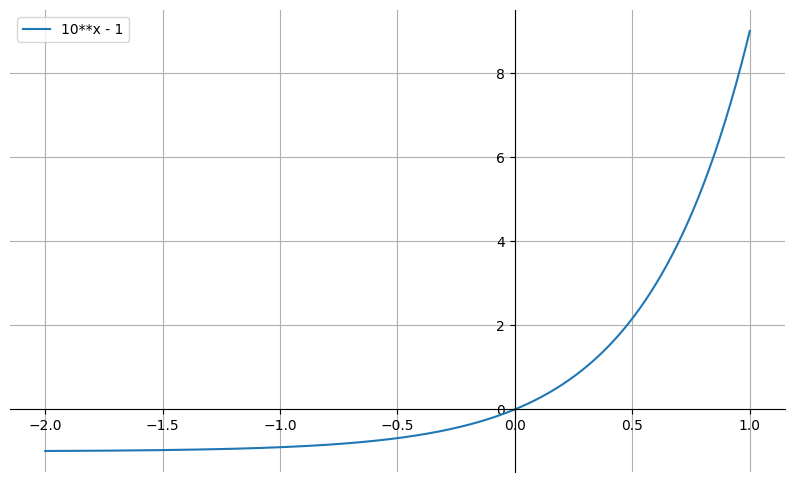

In [98]:
x_values = np.linspace(-2, 1, 400) # atur range x
y_values = func_lambda(x_values)

fig, ax = plt.subplots(figsize=(10, 6))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_label_coords(0.5, -0.05)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.plot(x_values, y_values, label=str(func))
ax.legend()
plt.grid(True)
plt.show()

# Metode Bolzano / Bisection

**Keterangan:**
- `f` = fungsi matematika
- `a` = batas bawah interval
- `b` = batas atas interval
- `tol` = nilai toleransi error
- `max_iter` = jumlah iterasi maksimum

In [99]:
# Fungsi untuk mencari akar persamaan dengan metode bisection
def bisection(f, a, b, tol=1e-5, max_iter=15):
    res = np.empty(max_iter)
    for i in range(max_iter):
        c = (a + b) / 2
        res[i] = c
        if f(c) == 0 or (b - a) / 2 < tol:
            return c
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    return res

In [100]:
a = int(input("Masukkan batas bawah: "))
b = int(input("Masukkan batas atas: "))
res_bisection = bisection(func_lambda, a, b)

In [101]:
hasil_bisection = pd.DataFrame(res_bisection, columns=['Akar persamaan'])
hasil_bisection

,Akar persamaan
0,-0.500000
1,0.250000
2,-0.125000
3,0.062500
4,-0.031250
5,0.015625
6,-0.007812
7,0.003906
8,-0.001953
9,0.000977


In [102]:
# Membuat plot untuk setiap iterasi
paths = []
for i, res in enumerate(res_bisection):
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.xaxis.set_label_coords(0.5, -0.05)
    ax.yaxis.set_label_coords(-0.05, 0.5)

    ax.plot(x_values, y_values, label=str(func))
    ax.axvline(x=res, color='r', linestyle='-')  # plot hasil bisection
    ax.legend()

    path = f'plot_{i}.png'
    plt.savefig(path)
    paths.append(path)

    plt.close()

# Membuat GIF dari gambar
images = [imageio.imread(path) for path in paths]
imageio.mimsave('movie.gif', images, fps=1)

C:\Users\Andika\AppData\Local\Temp\ipykernel_20016\2053365481.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(path) for path in paths]


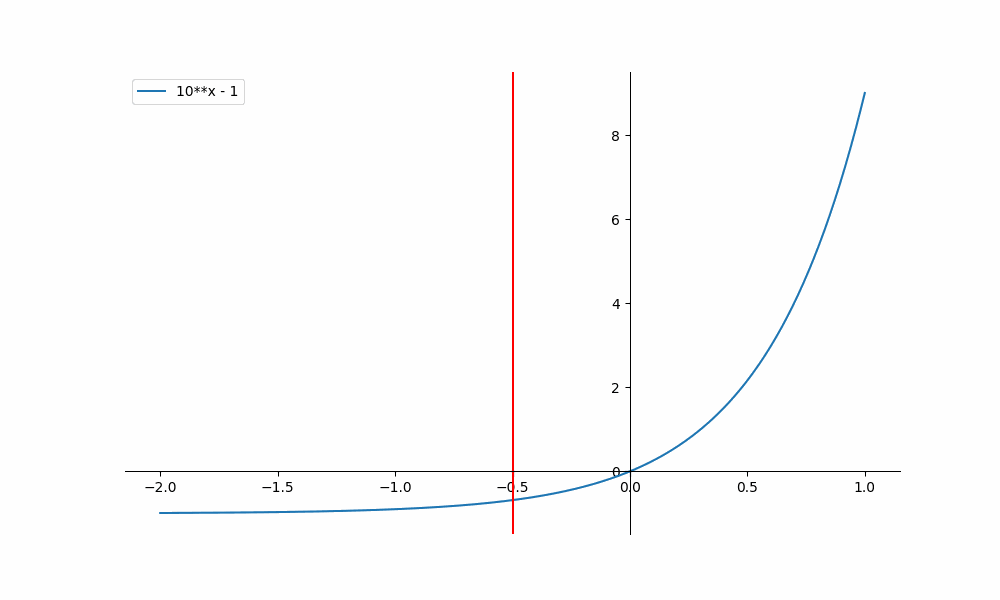

In [103]:
# membuka file gif
from IPython.display import Image
Image(filename="movie.gif")

# Sekian, Terima Kasih